# Data Understanding and Feature Engineering

This Notebook ideally follows the `data_exploration` one.

## Autoreload

Autoreload allows the notebook to dynamically load code: if we update some helper functions *outside* of the notebook, we do not need to reload the notebook.

In [1]:
%load_ext autoreload
%autoreload 2

## Imports

In [2]:
# Uncomment the next line and install the package, in case you don't have it in your environment
#%pip install procyclingstats

In [3]:
import ast
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import procyclingstats as pcs
import re
import seaborn as sns
import sys



sys.path.append('../dataset/')
sys.path.append('../utility/')

from utility.data_understanding import *

In the `data_exploration` notebook we've assessed the quality of the data, also adressing some problems that were discovered.

### Dataframes

Motivated by the "imputation by scraping", we decided to retrieve data from (procyclingstats)[https://www.procyclingstats.com/index.php], which is a trusted source of data on cyclism. <br>
The `procyclingstats` notebook details the process of web scraping and data retrieval & augmentation.

In [4]:
cyclist_df = pd.read_csv(os.path.join('dataset','cyclists_new.csv'))
races_df = pd.read_csv(os.path.join('dataset','races_new.csv'))

The dataframes have to be preprocessed in order to be used

In [5]:
cyclist_df = cyclist_df.drop(columns=['Unnamed: 0'], errors='ignore')
cyclist_df['full_history'] = cyclist_df['full_history'].apply(ast.literal_eval)

In [6]:
races_df_races_df = races_df.drop(columns=['Unnamed: 0'], errors='ignore')

In [7]:
cyclist_df.head()

,_url,name,birth_year,weight,height,nationality,points_total,tot_seasons_attended,full_history
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy,15.0,2,"[{'season': 1989, 'points': 14.0, 'rank': 828}..."
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France,4717.0,11,"[{'season': 1997, 'points': 164.0, 'rank': 257..."
2,jan-maas,Jan Maas,1996.0,69.0,189.0,Netherlands,315.0,10,"[{'season': 2024, 'points': 30.0, 'rank': 990}..."
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995.0,78.0,192.0,Belgium,953.0,9,"[{'season': 2023, 'points': 298.0, 'rank': 218..."
4,jose-felix-parra,José Félix Parra,1997.0,55.0,171.0,Spain,459.0,5,"[{'season': 2024, 'points': 197.0, 'rank': 317..."


In [8]:
races_df.head()

,Unnamed: 0,_url,name,stage_type,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
0,0,tour-de-france/1978/stage-6,Tour de France,RR,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,0,sean-kelly,22.0,True,False,False,team/flandria-velda-lano-1978,0.0
1,1,tour-de-france/1978/stage-6,Tour de France,RR,70.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,1,gerrie-knetemann,27.0,True,False,False,team/ti-raleigh-mc-gregor-1978,0.0
2,2,tour-de-france/1978/stage-6,Tour de France,RR,50.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,2,rene-bittinger,24.0,True,False,False,team/flandria-velda-lano-1978,0.0
3,3,tour-de-france/1978/stage-6,Tour de France,RR,40.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,3,joseph-bruyere,30.0,True,False,False,team/c-a-1978,0.0
4,4,tour-de-france/1978/stage-6,Tour de France,RR,32.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,4,sven-ake-nilsson,27.0,True,False,False,team/miko-mercier-1978,0.0


## Added features

Let's discuss feature augmentation and feature engineering

### Added features (scraping)

We decided to add the following features, obtained by scraping the website:

For the `cyclists` dataset:
- `full_history`: the rider’s points per season history, obtained by reading the *PCS Ranking position per season* table 
- `points_total`: the rider's points accumulated throughout his career, obtained by summing the values in the aforementioned table
- `tot_season_attended`: the number of seasons ran by the cyclist
We decided not to use these features for now, because the data they contain comes from many cyclism disciplines, whereas the data at our disposal only includes road races.

For the `races` dataset:
- `stage_type`: can be RR (Road Race), ITT (Individual Time Trial), TTT (Team Time Trial). Obtained from the stage's webpage

The following changes were made, w.r.t. the original `races` dataset:
- The column `name` now has a unique identifier for each race. Races with identical `_url` prefix are the same race, but in the original dataset they might have been referred with multiple names
- The values in the `points` and `uci_points` column  are now those coming from the website. In the original dataset the (UCI) points were those of the first runner-up 
- The values in the `cyclist_team` column are now those coming from the website. 

In [9]:
cyclist_df = cyclist_df.drop(columns=['points_total', 'tot_seasons_attended','full_history'], errors='ignore')
cyclist_df.head()

,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France
2,jan-maas,Jan Maas,1996.0,69.0,189.0,Netherlands
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995.0,78.0,192.0,Belgium
4,jose-felix-parra,José Félix Parra,1997.0,55.0,171.0,Spain


### Other added features (races)

By comparing the values with the website, we noticed that the `date` column includes the date of the competition and the time the cyclist took to complete the race. So we disentangle such values.

In [10]:
races_df['time'] = races_df['date'].apply(lambda string: string.split(' ')[1])
races_df['date'] = races_df['date'].apply(lambda string: string.split(' ')[0])

Another feature is the ratio between the vertical meters and the length of the stage, in percentage. This is a "climb density", or steepness.

In [11]:
races_df['steepness'] = 100*races_df['climb_total']/races_df['length']

We also add the season in which a race is ran, by looking at the date.

In [12]:
# 0: winter, 1: spring, 2: summer, 3: fall
races_df['season'] = races_df['date'].apply(lambda data: (int(data.split('-')[1])//3)%4)

**TODO** Le gare hanno un certo ordine! Sarebbe figo trovarlo...

Some competitions are composed of multiple stages, each of which is ran in a different day. One example of this is the Giro d'Italia. Some other are ran in a single stage (that takes a single day), one example being the Ronde van Vlaanedren.

In [13]:
races_df['is_staged'] = races_df['_url'].apply(lambda race_url: bool(re.match(r"[a-z0-9-]+/\d{4}/(prologue|stage-\d)",race_url)))

In [14]:
gare_non_tappe = np.unique([gara.split('/')[0] for gara in races_df.loc[races_df['is_staged'] == False,'_url'].unique()])
gare_tappe = np.unique([gara.split('/')[0] for gara in races_df.loc[races_df['is_staged'],'_url'].unique()])

print(f"Non-staged races: {gare_non_tappe}")
print()
print(f"Staged races: {gare_tappe}")

Non-staged races: ['amstel-gold-race' 'dwars-door-vlaanderen' 'e3-harelbeke' 'gp-montreal'
 'gp-quebec' 'il-lombardia' 'la-fleche-wallone' 'liege-bastogne-liege'
 'milano-sanremo' 'omloop-het-nieuwsblad' 'paris-roubaix'
 'ronde-van-vlaanderen' 'san-sebastian' 'strade-bianche'
 'world-championship']

Staged races: ['dauphine' 'giro-d-italia' 'gran-camino' 'itzulia-basque-country'
 'paris-nice' 'tirreno-adriatico' 'tour-de-france' 'tour-de-romandie'
 'tour-de-suisse' 'uae-tour' 'volta-a-catalunya' 'vuelta-a-espana']


Some competitions take place in the same location each year, while others change location each year.

In [15]:
# Mmm I don't know how to do this... Domain knowledge?

Another trivial yet interesting feature is the country in which the competition is held. It's domain knowledge, summarized in the following dictionary.

**OSS**: This dictionary, and the following cells that create the `race_country` column, use the values of the `name` column in the `races_new.csv` file! 

In [16]:
# For this dictionary I use the names in the races_new.csv format!
country_competition_dict = {
    'France' : ['Tour de France', 
                'Paris - Nice',
                'Criterium du Dauphiné',
                'Paris - Roubaix'],
    'Spain' : ['La Vuelta ciclista a España',
                'Volta Ciclista a Catalunya',
                'Gran Camiño',
                'Itzulia Basque Country',
                'Clasica Ciclista San Sebastian'],
    'Italy' : ['Tirreno-Adriatico', 
               'Milano-Sanremo',
               "Giro d'Italia",
               'Monte Paschi Eroica', 
               'Giro di Lombardia'],
    'Belgium' : ['Ronde van Vlaanderen - Tour des Flandres ME',
                 'La Flèche Wallonne',
                 'E3 BinckBank Classic',
                 'Liège - Bastogne - Liège',
                 'Dwars door België / À travers la Belgique',
                 'Omloop Het Nieuwsblad ME'
                 ],
    'Netherlands' :['Amstel Gold Race'],
    'Switzerland' : ['Tour de Suisse',
                     'Tour de Romandie'],
    'UAE' : ['UAE Tour'],
    'Canada' : ['Grand Prix Cycliste de Quebec', 
                'Grand Prix Cycliste de Montréal']
    # 'World Championships - Road Race' doesn't take place in a fixed country
}

In [17]:
def coutry_returner(race_name:str,
        countries_races_dict:dict[str,list[str]] = country_competition_dict) -> str:
    for country, names_list in countries_races_dict.items():
        if race_name in names_list:
            return country
    return np.nan

races_df['race_country'] = races_df['name'].apply(coutry_returner)

Now, we'll try to infer some value regarding the performance of each individual cyclist at a given age. 
We try to compute an age performance index: it will assign greater values based on the points and the oldness of the cyclist at a given race.

In [18]:
# First, we normalize the scores
races_df['norm_points'] = races_df.groupby('_url')['points'].transform(
    lambda x: (x - x.mean()) / x.std()
)
# Then, we multiply by age
races_df['age_performance_index'] = races_df['norm_points'] * races_df['cyclist_age']

Now, we are going to do the same process for the `startlist_quality`. By engineering this feature, we may infer a set of points to assign to each race that is more nuanced towards the expertise of the cyclists that will participate in it.

In [19]:
races_df['quality_adjusted_points'] = races_df['norm_points'] * races_df['startlist_quality']

Now we'll define a feature to better determine a stamina indicator for each race. We want to take into account any factor that might indicate the need of a better stamina.

In [20]:
races_df['normalized_length'] = races_df['length'] / races_df['length'].max()
races_df['normalized_quality'] = races_df['startlist_quality'] / races_df['startlist_quality'].max()
races_df['normalized_steepness'] = races_df['steepness'] / races_df['steepness'].max()
races_df['profile_adjustment'] = (races_df['profile'] - 1) / 3
# if we manage to impute temperature would be great to have it normalized and used here. Maybe normalization should be over a bimodal? Higher on the extremes?
# races_df['temperature_impact'] = (races_df['average_temperature'] - 20)**2 / 100 # 20 is the ideal temperature, 100 is 10^2, defines how sensitive the model is to deviations

# Apply weights based on factor importance for stamina
races_df['stamina_index'] = (
    races_df['normalized_length'] * 0.25 +
    races_df['normalized_quality'] * 0.25 +
    races_df['normalized_steepness'] * 0.25 +
    races_df['profile_adjustment'] * 0.25
    # + races_df['temperature_impact'] * 0.25
)


### Other added features (cyclists)

We add the BMI (body Mass Index) of each cyclist: the ratio between the weight (kilograms) and the height in square meters.

In [21]:
cyclist_df['bmi'] = cyclist_df['weight']/np.square(cyclist_df['height']/100)

Now, let's try to infer an experience level for the cyclists. We should take into account everything, but to have a relaxed yet probably closer-to-the-truth model we'll only take into account the races that the cyclists ran into.

In [22]:
race_count = races_df.groupby('cyclist')['_url'].count()

race_count_df = pd.DataFrame({'_url': race_count.index, 'race_count': race_count.values})
cyclist_df = cyclist_df.merge(right=race_count_df, how='left', on='_url')
cyclist_df['race_count'] = cyclist_df['race_count'].replace(np.nan, 0)

# now with all of our complete, total, absolute domain knowledge we can define the experience levels
experience_levels = ['beginner', 'developing', 'competitive', 'semi-pro', 'pro']
bins = [0, 15, 50, 100, 200, float('inf')]

cyclist_df['experience_level'] = pd.cut(cyclist_df['race_count'], bins=bins, labels=experience_levels, right=False)

## Studying the (added?) features

Let's do some data understanding with (also) the new features that we discovered!

### Exploration of `stage_type`

In [62]:
races_df.drop_duplicates(subset=['_url']).groupby('is_staged')['stage_type'].value_counts()

is_staged  stage_type
False      RR             620
True       RR            3748
           ITT            483
Name: count, dtype: int64

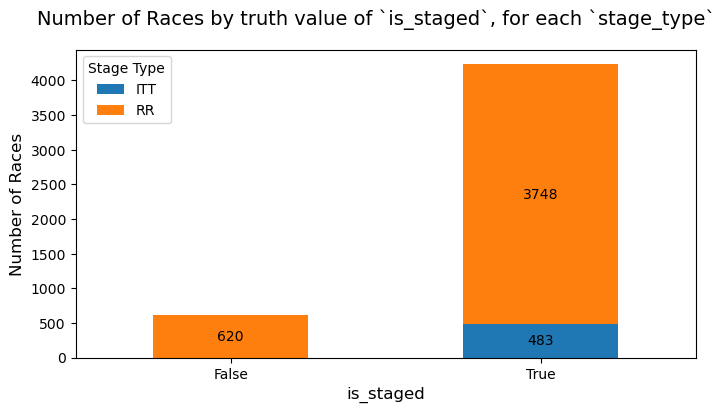

In [90]:
fig, ax = plt.subplots(figsize=(8, 4))
fig.suptitle('Number of Races by truth value of `is_staged`, for each `stage_type`', fontsize=14)

# Get the data
data = races_df.drop_duplicates(subset=['_url']).groupby('is_staged')['stage_type'].value_counts().unstack()

# Plot the data
data.plot(kind='bar', stacked=True, ax=ax)

# Customize the plot
ax.set_ylabel('Number of Races', fontsize=12)
ax.set_xticklabels(['False', 'True'], rotation=0)
ax.set_xlabel('is_staged', fontsize=12)
ax.legend(title='Stage Type', loc='upper left')

# Annotate each bar with the population count
for container in ax.containers:
    # To hide the ugly 0
    labels = [f'{int(v.get_height())}' if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center')

plt.show()

From the plot we can see that only the staged races such as Tour de France have Individual Time Trials. The non-staged races are categorized as Road Races. The `ITT` stages are really few compared to the "normal" `RR` stages.

The following table shows, for each (staged) competition, how many stages (on average) in total are `RR`, how many are `ITT`, and their proportion.

In [119]:
# Calculate non-normalized counts
non_normalized_counts = races_df[races_df['is_staged']].drop_duplicates(subset=['_url']).groupby('name')['stage_type'].value_counts().unstack().fillna(0)

# Calculate normalized counts
normalized_counts = races_df[races_df['is_staged']].drop_duplicates(subset=['_url']).groupby('name')['stage_type'].value_counts(normalize=True).unstack().fillna(0)

# Rename columns
normalized_counts.rename(columns={'RR': 'RR (norm.)', 'ITT': 'ITT (norm.)'}, inplace=True)

# Add the total column from non-normalized counts to normalized counts
normalized_counts['total'] = non_normalized_counts.sum(axis=1)

pd.concat([normalized_counts, non_normalized_counts], axis=1)

stage_type,ITT (norm.),RR (norm.),total,ITT,RR
name,,,,,
Criterium du Dauphiné,0.118321,0.881679,262,31,231
Giro d'Italia,0.105263,0.894737,627,66,561
Gran Camiño,0.285714,0.714286,7,2,5
Itzulia Basque Country,0.172131,0.827869,122,21,101
La Vuelta ciclista a España,0.100244,0.899756,818,82,736
Paris - Nice,0.106557,0.893443,366,39,327
Tirreno-Adriatico,0.124498,0.875502,249,31,218
Tour de France,0.105985,0.894015,802,85,717
Tour de Romandie,0.151515,0.848485,231,35,196


We can see that for all races except the Grand Camino, 10\% circa of the races are Individual Time Trials. In particular, the proportion is the same for all staged races. In other words, the distribution of `stage_type` (i.e. of `RR` and `ITT`) is uniform, with respect to the races themselves.

### `length` vs `stage_type`

Thanks to the domain experts (prof. Setzu) we know that a stage can simply be a road race (RR) or can be a individual time trial (ITT) stage. Furthermore:
- All staged races (e.g. Tour de France) have at least one stage that is ITT
- A ITT differs from a RR for the fact that in the latter all cyclists start at the same time all together, while in a ITT the cyclists start cycling one after the other
- Typically ITTs are shorter

Let's try to see how the `stage_type` compares with the `delta`

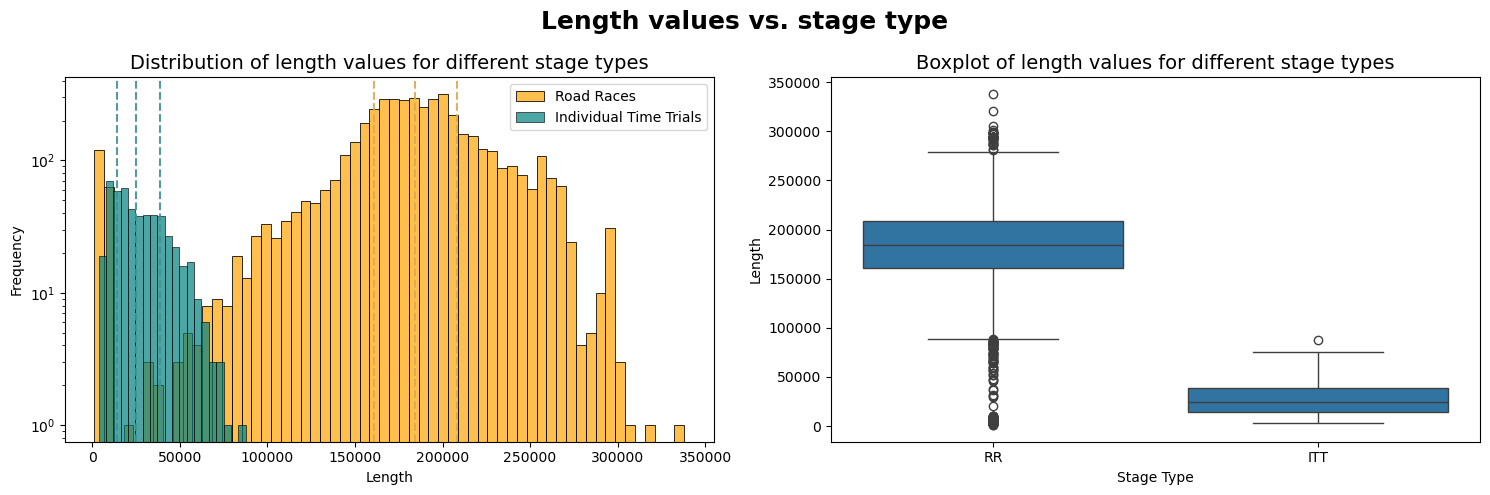

In [23]:
races_df_ = races_df.drop_duplicates(subset=['_url'], keep='first')
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Length values vs. stage type', fontsize=18, fontweight='bold')


sns.histplot(races_df_.loc[races_df_['stage_type'] == 'RR', 'length'], bins=60, kde=False, color='orange', alpha=0.7, label='Road Races', ax=ax[0])
rr_quartiles = races_df_.loc[races_df_['stage_type'] == 'RR', 'length'].quantile([0.25, 0.5, 0.75])

sns.histplot(races_df_.loc[races_df_['stage_type'] == 'ITT', 'length'], bins=20, kde=False, color='teal', alpha=0.7, label='Individual Time Trials', ax=ax[0])
itt_quartiles = races_df_.loc[races_df_['stage_type'] == 'ITT', 'length'].quantile([0.25, 0.5, 0.75])

# Add vertical lines for Road Races quartiles
for q in rr_quartiles:
    ax[0].axvline(q, linestyle='--', color=(220/255,170/255,80/255), alpha=0.9)

# Add vertical lines for Individual Time Trials quartiles
for q in itt_quartiles:
    ax[0].axvline(q, linestyle='--', color=(65/255,145/255,145/255), alpha=0.9)
    
ax[0].set_title('Distribution of length values for different stage types', fontsize=14)
ax[0].set_xlabel('Length')
ax[0].set_ylabel('Frequency')
ax[0].set_yscale('log')
ax[0].legend()

sns.boxplot(data=races_df_, x='stage_type', y='length', ax=ax[1])
ax[1].set_title('Boxplot of length values for different stage types', fontsize=14)
ax[1].set_xlabel('Stage Type')
ax[1].set_ylabel('Length')



plt.tight_layout()
plt.show()

As we can see, the two distributions are very well separated visually, but there is some overlap, because there are short road races.

In [24]:
# Not the best... To review... To do better... Maybe with the name_stage feature?
races_df.loc[(races_df['length'] < 100000) & (races_df['stage_type'] == 'RR'), 'name'].unique()

array(['Volta Ciclista a Catalunya', 'La Vuelta ciclista a España',
       'Tour de Romandie', 'Tour de Suisse', 'Paris - Nice',
       "Giro d'Italia", 'Tour de France', 'Tirreno-Adriatico',
       'Criterium du Dauphiné', 'Itzulia Basque Country'], dtype=object)

In [25]:
races_df_.groupby('stage_type')['length'].describe()

,count,mean,std,min,25%,50%,75%,max
stage_type,,,,,,,,
ITT,512.0,27820.976562,15916.229561,3600.0,14150.0,24850.0,38725.0,87500.0
RR,4769.0,180486.781296,53072.679256,1000.0,160700.0,184000.0,208500.0,338000.0


As we can see, `RR` is the majority class. 

The average length of a `ITT` is 29,7 Km, very close to the median, that is 28 Km. <br>
The average length of a `RR` is 180 Km, very close to the median, that is 183 Km.

We can notice that all the mass of the `ITT`'s length distribution is before the first quartile of the `RR`'s length distribution. 

**TODO**: Correlation? O qualcosa di simile? Dovrei studiarlo...

In [26]:
# Qui ci mettiamo la correlazione o qualcosa del genere.

All in all, `length` is an excellent predictor of `stage_type`, but not a perfect one. It's ok to have the ground truth.

### `startlist_quality` vs `stage_type`

We can see if other bimodal distributions are "caused" by the `stage_type`, let's analize the `startlist_quality` in the same way

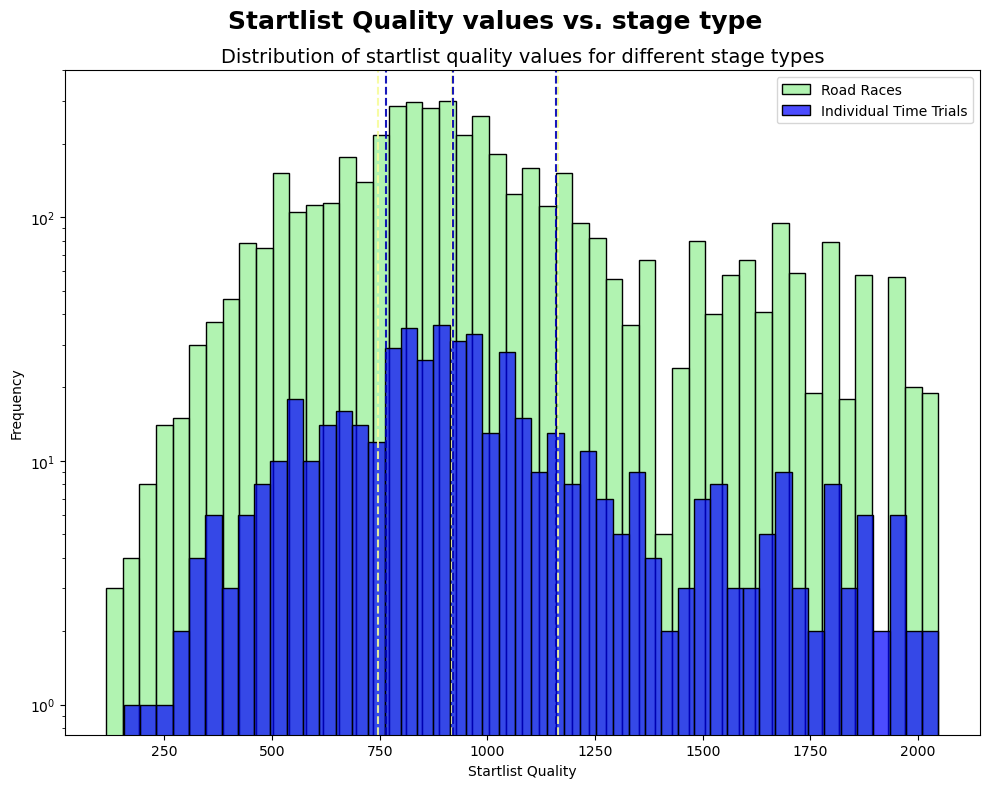

In [27]:
fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle('Startlist Quality values vs. stage type', fontsize=18, fontweight='bold')

sns.histplot(races_df_.loc[races_df_['stage_type'] == 'RR', 'startlist_quality'], bins=50, kde=False, color='lightgreen', alpha=0.7, label='Road Races', ax=ax)
rr_quartiles = races_df_.loc[races_df_['stage_type'] == 'RR', 'startlist_quality'].quantile([0.25, 0.5, 0.75])

sns.histplot(races_df_.loc[races_df_['stage_type'] == 'ITT', 'startlist_quality'], bins=50, kde=False, color='blue', alpha=0.7, label='Individual Time Trials', ax=ax)
itt_quartiles = races_df_.loc[races_df_['stage_type'] == 'ITT', 'startlist_quality'].quantile([0.25, 0.5, 0.75])

# Add vertical lines for Road Races quartiles
for q in rr_quartiles:
    ax.axvline(q, linestyle='--', color=(247/255,252/255,154/255), alpha=0.9)#I'm not gonna lie, I'm not gonna search for the right color

# Add vertical lines for Individual Time Trials quartiles
for q in itt_quartiles:
    ax.axvline(q, linestyle='--', color=(0/255,0/255,180/255), alpha=0.9)
    
ax.set_title('Distribution of startlist quality values for different stage types', fontsize=14)
ax.set_xlabel('Startlist Quality')
ax.set_ylabel('Frequency')
ax.set_yscale('log')
ax.legend()

plt.tight_layout()
plt.show()

This is the opposite of what I was expecting but is indeed intresting to see that the distributions have almost the same shape, this could suggest that the people racing are the same.

***Andrea***: *I think that it's reasonable that the two frequencies follow the same patterns, the `RR` one being a "dilated" version of the `ITT` one, because basically in all the staged races there's one stage that is an ITT and more or less will have the same participants of all the other stages (therefore the same `startlist_quality`). Most of the competitions are staged (we should assess that...), the non-staged ones "add a little bit of noise to this process", but could look more into detail if so wishes. But maybe you had a different idea.*

We think that the road races that are short can be *prologue* of stage races. We suppose this after we've seen that the shortest race is a prologue. If this is true we could say that the distribution of non prologue RR is more or less Gaussian

Firt of all we need to create a column that tells us the stage name near the name, s.t. we don't need to retrieve the information from the `_url` each time

In [28]:
def get_name_stage(row) -> Tuple[str, str]:
    array_of_info = row['_url'].split('/')
    array_of_info[-1] = np.nan if array_of_info[-1] == 'result' else array_of_info[-1]
    return array_of_info[0], array_of_info[-1]

#define column name
races_df['stage'] = races_df.apply(lambda row: get_name_stage(row)[1], axis=1)
# move name column to the second position
cols = list(races_df.columns)
cols.insert(2, cols.pop(cols.index('stage')))
races_df = races_df[cols]

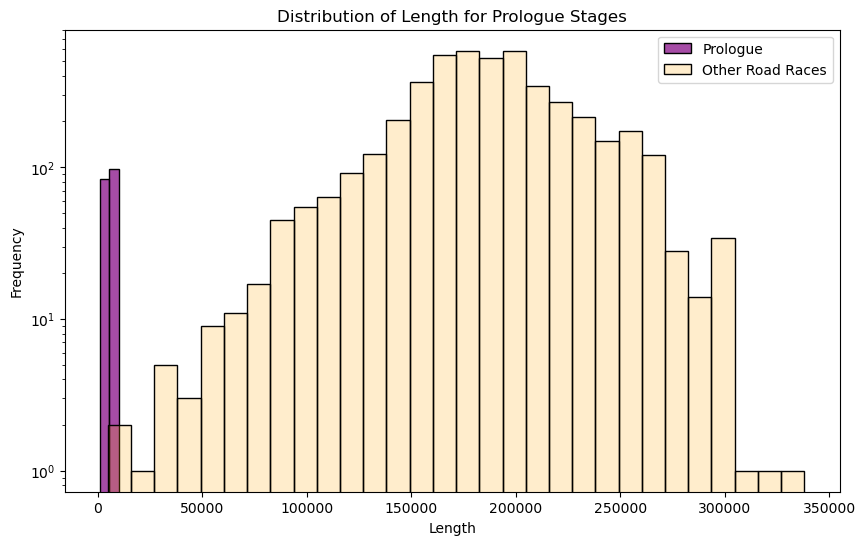

In [29]:
prologue_races = races_df.drop_duplicates(subset=['_url'])
other_rr = prologue_races[(prologue_races['stage_type'] == 'RR') & (prologue_races['stage'] != 'prologue')]
prologue_races = prologue_races[prologue_races['stage'] == 'prologue']

plt.figure(figsize=(10, 6))
sns.histplot(prologue_races['length'], bins=2, kde=False, color='purple', alpha=0.7)
sns.histplot(other_rr['length'], bins=30, kde=False, color='orange', alpha=0.2)
plt.title('Distribution of Length for Prologue Stages')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.yscale('log')
plt.legend(['Prologue', 'Other Road Races'])
plt.show()

We can discuss about the color palette of this plot, and the way it is obtained, but for shure we can say that prologues are the short road races. To see this even better, let's control the distribution of just the prologue lenght since now it is all compressed to the left. 

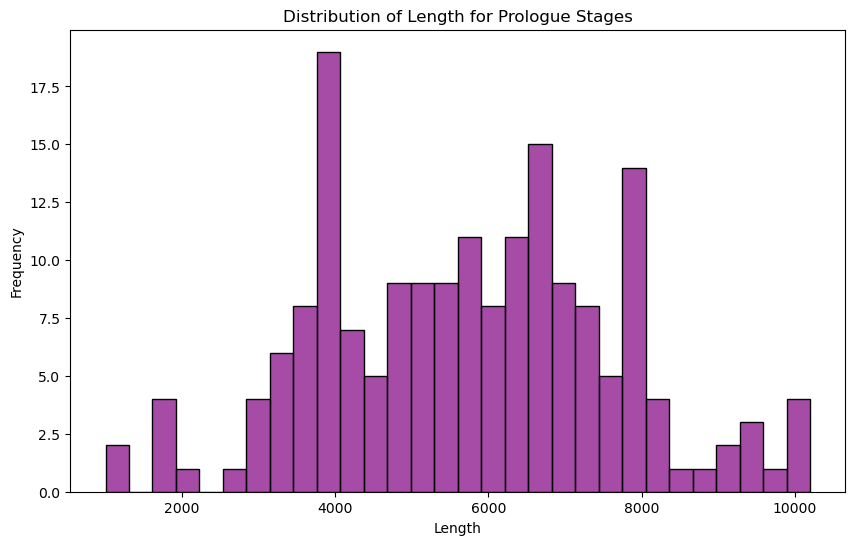

In [30]:
races_df_ = races_df.drop_duplicates(subset=['_url'])
# Filter the races where the stage is a prologue
prologue_races = races_df_[races_df_['stage'] == 'prologue']

# Plot the length of these races
plt.figure(figsize=(10, 6))
sns.histplot(prologue_races['length'], bins=30, kde=False, color='purple', alpha=0.7)
plt.title('Distribution of Length for Prologue Stages')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [31]:
print('There are:', prologue_races[prologue_races['stage_type'] == 'RR'].shape[0], "RR")
print("      and:", prologue_races[prologue_races['stage_type'] == 'ITT'].shape[0],"ITT")

There are: 180 RR
      and: 1 ITT


Nice, we discovered that the shape of the overall shape of the length distribution was given by the summation of 3 different "almost gaussian distribution". We can also see that one prologue only was an ITT race, and there are not many analysis we can do on a single value...

### Top Cyclist

Up to now there is no way of knowing which cyslist is the best, and probably also at the end of the project we will not be able to say who's the best... But at least we can try to give an estime based on who has accumulated more points (**considering only the races in our dataset**)

In [32]:
# Group by cyclist and sum the points
points_per_cyclist = races_df.groupby('cyclist')['points'].sum().reset_index()

# Rename the columns for clarity
points_per_cyclist.columns = ['name', 'total_points']

# Merge the points data with the cyclist_df
cyclist_df = cyclist_df.merge(points_per_cyclist, left_on='_url', right_on='name', how='left')
cyclist_df = cyclist_df.drop(columns=['name_y'])
cyclist_df = cyclist_df.rename(columns={'name_x': 'name'})

# Fill NaN values with 0 (for cyclists who have no points in the races_df)
cyclist_df['total_points'] = cyclist_df['total_points'].fillna(0)

cyclist_df.head()

,_url,name,birth_year,weight,height,nationality,bmi,race_count,experience_level,total_points
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy,NaN,1.0,beginner,0.0
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France,22.340297,223.0,pro,1354.0
2,jan-maas,Jan Maas,1996.0,69.0,189.0,Netherlands,19.316369,49.0,developing,60.0
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995.0,78.0,192.0,Belgium,21.158854,164.0,semi-pro,300.0
4,jose-felix-parra,José Félix Parra,1997.0,55.0,171.0,Spain,18.809206,50.0,competitive,5.0


# Dataset cleaning

Here we should copy the cleaning notebook because we have here many added feature that are not in the other notebook but that we need in the final cleaned dataset

The delta has already been discussed in an appropriate notebook so here we'll just report the cleaning process

In [33]:
initial_len = races_df.shape[0]
races_df = delta_based_dataset_cleaning(races_df)
final_len = races_df.shape[0]
print(f"removed lines {-final_len-(-initial_len)}")

removed lines 81591


**Bad Columns**

just a reminder of why these are not useful: `is_cobbled` is always false; `is_gravel` is always false; `cyclist_team` can change from year to year and there were some considerations about the fact that the name is just the name of the sponsor (so the team can be the same but with different name); `average_temperature` is almost always null; `Unnamed: 0` is a column created for error somewhere

In [34]:
columns_to_drop = [
    'is_cobbled',
    'is_gravel',
    'cyclist_team',
    'average_temperature',
    'Unnamed: 0',
]
races_df = races_df.drop(columns=columns_to_drop)
races_df.head()

,_url,stage,name,stage_type,points,uci_points,length,climb_total,profile,startlist_quality,...,is_staged,race_country,norm_points,age_performance_index,quality_adjusted_points,normalized_length,normalized_quality,normalized_steepness,profile_adjustment,stamina_index
0,tour-de-france/1978/stage-6,stage-6,Tour de France,RR,100.0,NaN,162000.0,1101.0,1.0,1241,...,True,France,2.597540,57.145880,3223.547139,0.47929,0.606253,0.065817,0.0,0.28784
1,tour-de-france/1978/stage-6,stage-6,Tour de France,RR,70.0,NaN,162000.0,1101.0,1.0,1241,...,True,France,1.532004,41.364108,1901.216954,0.47929,0.606253,0.065817,0.0,0.28784
2,tour-de-france/1978/stage-6,stage-6,Tour de France,RR,50.0,NaN,162000.0,1101.0,1.0,1241,...,True,France,0.821647,19.719520,1019.663498,0.47929,0.606253,0.065817,0.0,0.28784
3,tour-de-france/1978/stage-6,stage-6,Tour de France,RR,40.0,NaN,162000.0,1101.0,1.0,1241,...,True,France,0.466468,13.994040,578.886770,0.47929,0.606253,0.065817,0.0,0.28784
4,tour-de-france/1978/stage-6,stage-6,Tour de France,RR,32.0,NaN,162000.0,1101.0,1.0,1241,...,True,France,0.182325,4.922776,226.265387,0.47929,0.606253,0.065817,0.0,0.28784


**Saving the dataset**

In [35]:
races_df.to_csv(os.path.join('dataset', 'races_cleaned.csv'), index=False)
cyclist_df.to_csv(os.path.join('dataset', 'cyclists_cleaned.csv'), index=False)

## Rewatch

Let's analyze how some plot changed after all this work

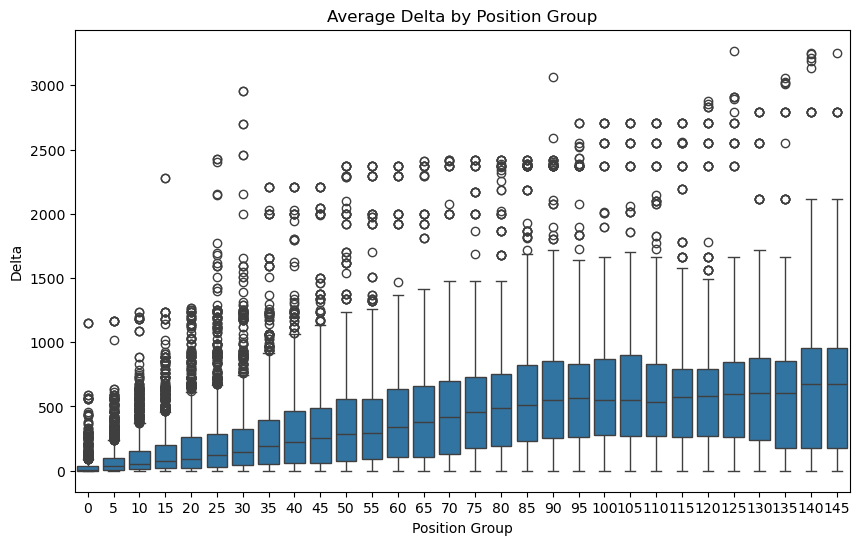

In [36]:
length_range = (250000, 2500000)  # Example length range in meters
# we still consider a subrange of the races because the delta is much
# influenced by this and so is expected a hig variance if we consider all the races
filtered_df = races_df[(races_df['length'] >= length_range[0]) & (races_df['length'] <= length_range[1])]
filtered_df = filtered_df[(filtered_df['stage_type'] == 'RR') & (filtered_df['stage'] != 'prologue')]
filtered_df = filtered_df[filtered_df['position'] < 150]
# Create a new column 'position_group' that groups positions in intervals of 5
filtered_df = filtered_df.assign(position_group=(filtered_df['position'] // 5) * 5)

# Plot the box plot for the average delta by position group
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='position_group', y='delta')
plt.title('Average Delta by Position Group')
plt.xlabel('Position Group')
plt.ylabel('Delta')
plt.show()

This is pretty much the same :(
But some arbitrary cleaning was already done in the previous version, at least we can say tath this one is more 'theoretically grounded'

Anyway, we can see that the delta increse almost logarithmic, this means (personal interpretation to be discussed) that more or less all the athletes are on the same level 